<a href="https://colab.research.google.com/github/bodejan/computer-vision/blob/main/02_Dithering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Dithering


In [ ]:
#!pip install scikit-image


In [ ]:
import numpy as np

def quantize_1bit(image, threshold=128):
    return np.round(image / 255) * 255

def random_dithering(image):
    noise = (np.random.rand(*image.shape) - 0.5) * 255
    dithered_image = image + noise
    dithered_image = quantize_1bit(dithered_image)
    return dithered_image


def matrix_dithering(image, matrix):
    height, width = image.shape
    dithered_image = np.zeros_like(image)
    for y in range(height):
        for x in range(width):
            threshold = matrix[y % len(matrix)][x % len(matrix)]
            dithered_image[y, x] = 255 if image[y, x] > threshold * 255 else 0
    return dithered_image

def floyd_steinberg_dithering(image):
    height, width = image.shape
    dithered_image = np.zeros_like(image)
    for y in range(height):
        for x in range(width):
            old_pixel = image[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            dithered_image[y, x] = new_pixel
            error = old_pixel - new_pixel
            if x < width - 1:
                image[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                image[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                image[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                image[y + 1, x + 1] += error * 1 / 16
    return dithered_image


def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

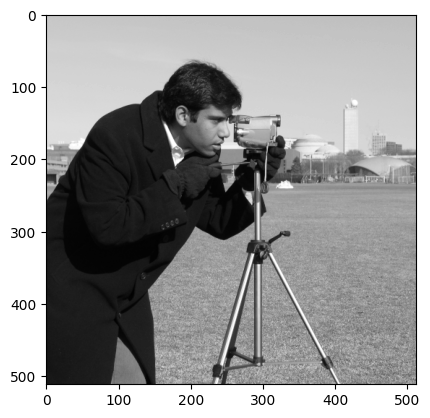

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
import cv2

# Load the "camera" image from skimage.data
original_image = data.camera()
# other options
#original_image = data.brick ()
#original_image = data.checkerboard()


# Convert the image to grayscale if it's in color
if len(original_image.shape) == 3:
    original_image = rgb2gray(original_image)
    print(original_image.shape)

# Display the original image
plt.imshow(original_image, cmap='gray')
#plt.title('Original Image')
plt.show()


In [ ]:
# Bayer matrix according to https://en.wikipedia.org/wiki/Ordered_dithering

matrix_2x2 = (1/4) * np.array([[0, 2],
                        [3, 1]])

matrix_4x4 = (1/16) * np.array([[ 0,  8,  2, 10],
                        [12,  4, 14,  6],
                        [ 3, 11,  1,  9],
                        [15,  7, 13,  5]])

matrix_8x8 = (1/64) * np.array([[ 0, 32,  8, 40,  2, 34, 10, 42],
                        [48, 16, 56, 24, 50, 18, 58, 26],
                        [12, 44,  4, 36, 14, 46,  6, 38],
                        [60, 28, 52, 20, 62, 30, 54, 22],
                        [ 3, 35, 11, 43,  1, 33,  9, 41],
                        [51, 19, 59, 27, 49, 17, 57, 25],
                        [15, 47,  7, 39, 13, 45,  5, 37],
                        [63, 31, 55, 23, 61, 29, 53, 21]])

matrix_16x16 = (1/256) * np.array([[0, 128, 32, 160, 8, 136, 40, 168, 2, 130, 34, 162, 10, 138, 42, 170],
                        [192, 64, 224, 96, 200, 72, 232, 104, 194, 66, 226, 98, 202, 74, 234, 106],
                        [48, 176, 16, 144, 56, 184, 24, 152, 50, 178, 18, 146, 58, 186, 26, 154],
                        [240, 112, 208, 80, 248, 120, 216, 88, 242, 114, 210, 82, 250, 122, 218, 90],
                        [12, 140, 44, 172, 4, 132, 36, 164, 14, 142, 46, 174, 6, 134, 38, 166],
                        [204, 76, 236, 108, 196, 68, 228, 100, 206, 78, 238, 110, 198, 70, 230, 102],
                        [60, 188, 28, 156, 52, 180, 20, 148, 62, 190, 30, 158, 54, 182, 22, 150],
                        [252, 124, 220, 92, 244, 116, 212, 84, 254, 126, 222, 94, 246, 118, 214, 86],
                        [3, 131, 35, 163, 11, 139, 43, 171, 1, 129, 33, 161, 9, 137, 41, 169],
                        [195, 67, 227, 99, 203, 75, 235, 107, 193, 65, 225, 97, 201, 73, 233, 105],
                        [51, 179, 19, 147, 59, 187, 27, 155, 49, 177, 17, 145, 57, 185, 25, 153],
                        [243, 115, 211, 83, 251, 123, 219, 91, 241, 113, 209, 81, 249, 121, 217, 89],
                        [15, 143, 47, 175, 7, 135, 39, 167, 13, 141, 45, 173, 5, 133, 37, 165],
                        [207, 79, 239, 111, 199, 71, 231, 103, 205, 77, 237, 109, 197, 69, 229, 101],
                        [63, 191, 31, 159, 55, 183, 23, 151, 61, 189, 29, 157, 53, 181, 21, 149],
                        [255, 127, 223, 95, 247, 119, 215, 87, 253, 125, 221, 93, 245, 117, 213, 85]])



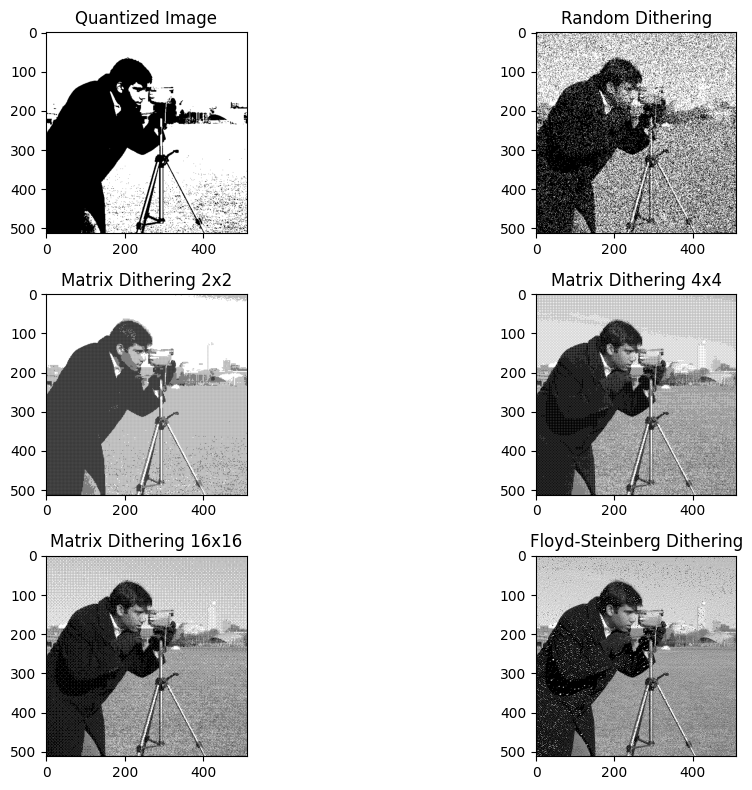

In [ ]:
quantized_image = quantize_1bit(original_image)
random_dithered_image = random_dithering(original_image)
matrix_dithered_image = matrix_dithering(original_image, matrix_2x2)
matrix_dithered_image_4x4 = matrix_dithering(original_image, matrix_4x4)
matrix_dithered_image_8x8 = matrix_dithering(original_image, matrix_16x16)
floyd_steinberg_dithered_image = floyd_steinberg_dithering(original_image)


# Display the dithered images
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.imshow(quantized_image, cmap='gray')
plt.title('Quantized Image')

plt.subplot(3, 2, 2)
plt.imshow(random_dithered_image, cmap='gray')
plt.title('Random Dithering')

plt.subplot(3, 2, 3)
plt.imshow(matrix_dithered_image, cmap='gray')
plt.title('Matrix Dithering 2x2')

plt.subplot(3, 2, 4)
plt.imshow(matrix_dithered_image_4x4, cmap='gray')
plt.title('Matrix Dithering 4x4')

plt.subplot(3, 2, 5)
plt.imshow(matrix_dithered_image_8x8, cmap='gray')
plt.title('Matrix Dithering 16x16')

plt.subplot(3, 2, 6)
plt.imshow(floyd_steinberg_dithered_image, cmap='gray')
plt.title('Floyd-Steinberg Dithering')

plt.tight_layout()
plt.show()

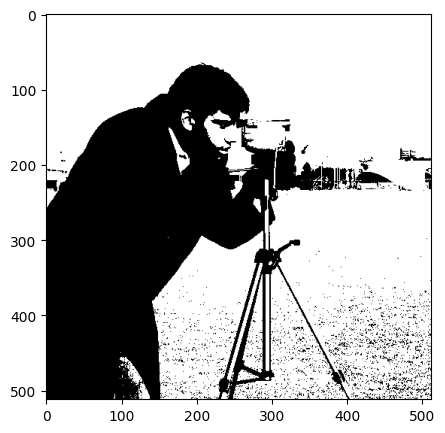

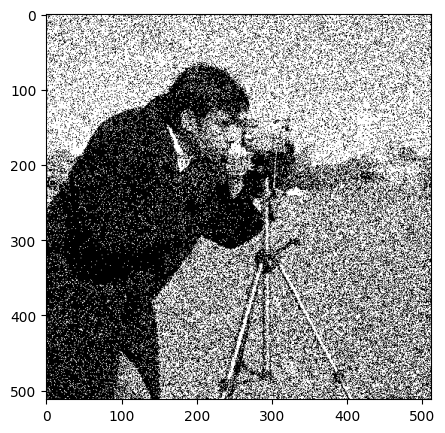

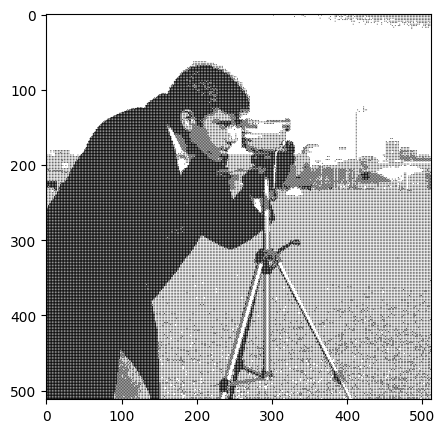

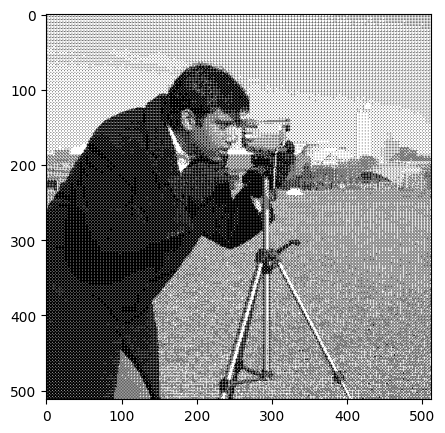

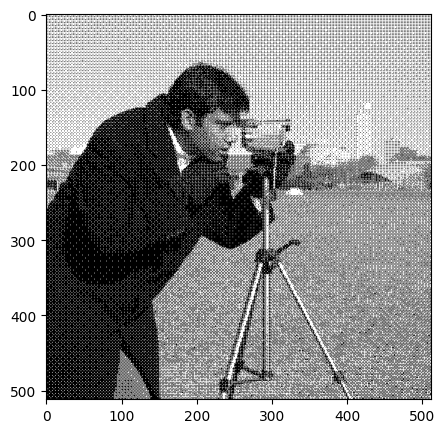

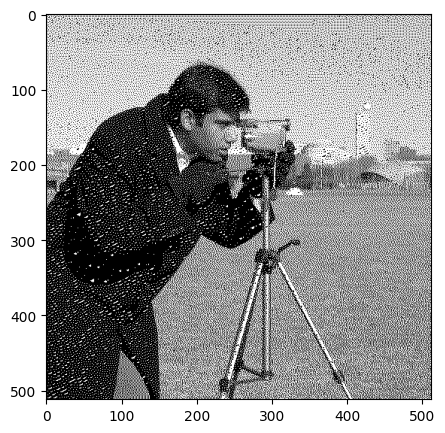

In [ ]:
# Display the dithered images individually

# Quantized Image
plt.figure(figsize=(5, 5))
plt.imshow(quantized_image, cmap='gray')
#plt.title('Quantized Image')
plt.show()

# Random Dithering
plt.figure(figsize=(5, 5))
plt.imshow(random_dithered_image, cmap='gray')
#plt.title('Random Dithering')
plt.show()

# Matrix Dithering 2x2
plt.figure(figsize=(5, 5))
plt.imshow(matrix_dithered_image, cmap='gray')
#plt.title('Matrix Dithering 2x2')
plt.show()

# Matrix Dithering 4x4
plt.figure(figsize=(5, 5))
plt.imshow(matrix_dithered_image_4x4, cmap='gray')
#plt.title('Matrix Dithering 4x4')
plt.show()

# Matrix Dithering 16x16
plt.figure(figsize=(5, 5))
plt.imshow(matrix_dithered_image_8x8, cmap='gray')
#plt.title('Matrix Dithering 16x16')
plt.show()

# Floyd-Steinberg Dithering
plt.figure(figsize=(5, 5))
plt.imshow(floyd_steinberg_dithered_image, cmap='gray')
#plt.title('Floyd-Steinberg Dithering')
plt.show()

In [ ]:
mse_quantized = mse(original_image, quantized_image)
mse_random = mse(original_image, random_dithered_image)
mse_matrix = mse(original_image, matrix_dithered_image)
mse_matrix_4x4 = mse(original_image, matrix_dithered_image_4x4)
mse_floyd_steinberg = mse(original_image, floyd_steinberg_dithered_image)

print(f"MSE Quantized: {mse_quantized}")
print(f"MSE Random Dithering: {mse_random}")
print(f"MSE Matrix Dithering 2x2: {mse_matrix}")
print(f"MSE Matrix Dithering 4x4: {mse_matrix_4x4}")
print(f"MSE Floyd-Steinberg Dithering: {mse_floyd_steinberg}")

MSE Quantized: 11672.428771972656
MSE Random Dithering: 14524.62357711792
MSE Matrix Dithering 2x2: 104.07514572143555
MSE Matrix Dithering 4x4: 104.06112670898438
MSE Floyd-Steinberg Dithering: 104.85260009765625


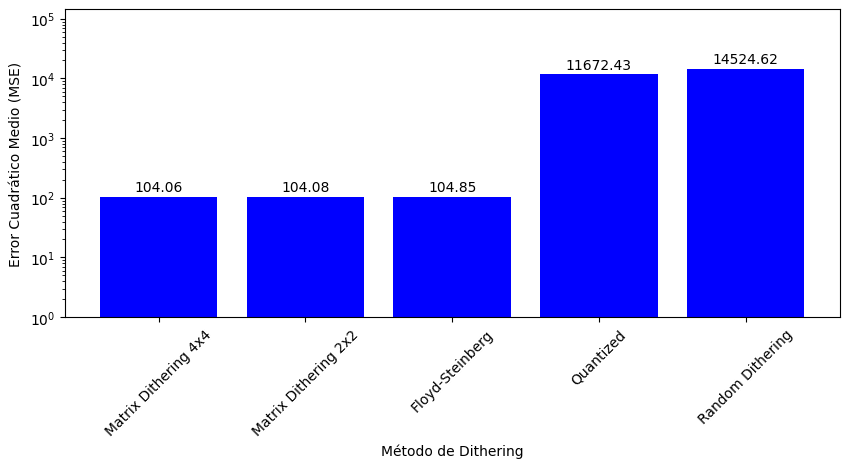

In [ ]:
import matplotlib.pyplot as plt

# List of methods and their corresponding MSE values
methods = ['Quantized', 'Random Dithering', 'Matrix Dithering 2x2', 'Matrix Dithering 4x4', 'Floyd-Steinberg']
mse_values = [mse_quantized, mse_random, mse_matrix, mse_matrix_4x4, mse_floyd_steinberg]

# Order methods and MSE values by increasing MSE
sorted_indices = np.argsort(mse_values)
sorted_methods = [methods[i] for i in sorted_indices]
sorted_mse_values = [mse_values[i] for i in sorted_indices]

# Create a bar chart on a log scale to visualize the MSE values
plt.figure(figsize=(10, 4))

# Convert MSE values to rounded strings
mse_values_str = [f'{mse:.2f}' for mse in sorted_mse_values]

# Add values as text labels above the bars
for i, mse_str in enumerate(mse_values_str):
    plt.text(i, sorted_mse_values[i] * 1.1, mse_str, ha='center', va='bottom', fontsize=10)

plt.bar(sorted_methods, sorted_mse_values, color='blue')
plt.xlabel('Método de Dithering')
plt.ylabel('Error Cuadrático Medio (MSE)')
#plt.title('Comparación de Valores de MSE para Métodos de Dithering')
plt.yscale('log')  # Use a logarithmic scale on the y-axis
plt.ylim(1, max(sorted_mse_values) * 10)  # Adjust y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()